[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python/blob/main/10-gyakorlat.ipynb)

# Házi feladatok

## 1. Maximum eloszlása szimmetrikus bolyongásnál

Szimmetrikus bolyongás alatt olyan véletlen sorozatot értünk, ami a nullából indul és minden lépése (megváltozása 1 vagy −1, 1/2–1/2 valószínűséggel a többi lépéstől függetlenül.

Írjunk egy függvényt, ami a numpy könyvtár függvényei segítségével elkészíti n hosszú bolyongásoknak egy m elemű sorozatát! Azaz a függvény kimenete egy $m\times n$ mátrix, az egyes sorok az egyes bolyongásokat írják le.

Rajzoljunk ki néhány bolyongást! Készítsünk hisztogramot a bolyongások utolsó pozíciójából (ez a függvény által visszakapott mátrix utolsó oszlopa). Valamint készítsünk hisztogramot a bolyongások maximális értékéből is (ezek a mátrixunk soronkénti maximumai). $n$ legyen legalább 100 és $m$ legalább 1000. Észreveszünk-e valami összefüggést az ábrák között?

A megoldás során jól jöhetnek a következő függvények:

```
import numpy as np
import matplotlib.pyplot as plt
np.random.binomial, np.cumsum, np.where, np.max
plt.plot, plt.hist, plt.title, plt.grid
```

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

def random_walk(n, m=1):
    steps = np.empty((m, n+1), dtype=np.int32)
    steps[:, 1:] = 2*np.random.binomial(1, 0.5, size=(m,n))-1
    steps[:, 0] = 0
    return steps.cumsum(axis=1)



In [2]:

import ipytest
ipytest.autoconfig()


In [3]:
%%ipytest

def test_random_walk():
    rw = random_walk(10)
    assert rw.shape == (1,11)

    rw = random_walk(100)
    assert set(np.diff(rw[0])) == {-1, 1}

    rw = random_walk(100, 1000)
    assert (rw[:, 0]==0).all()
    
    

.                                                                                            [100%]
1 passed in 0.01s


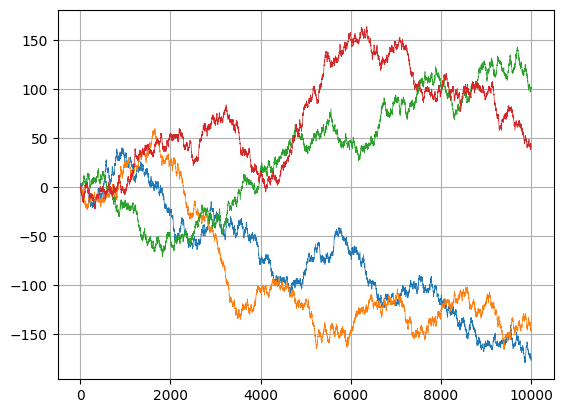

In [4]:
rw = random_walk(10000, 4)
for i in range(4):
    plt.plot(rw[i], linewidth=0.5)
plt.grid()
plt.show()

In [5]:
rw = random_walk(100, 50000)

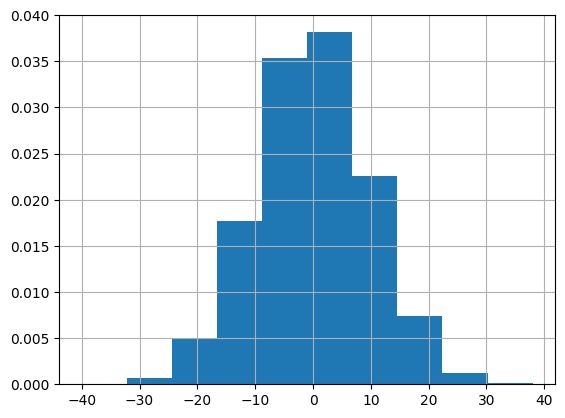

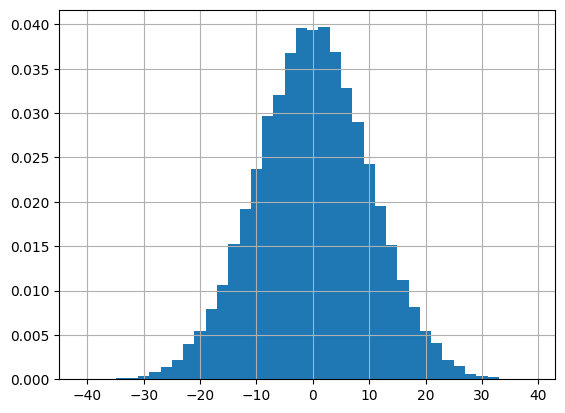

In [6]:
rw_last  =  rw[:, -1]
plt.hist(rw_last, density=True)
plt.grid()
plt.show()

bins = np.arange(rw_last.min()-1, rw_last.max()+2, 2)
plt.hist(rw_last, bins, density=True)
plt.grid()
plt.show()

(50000,)


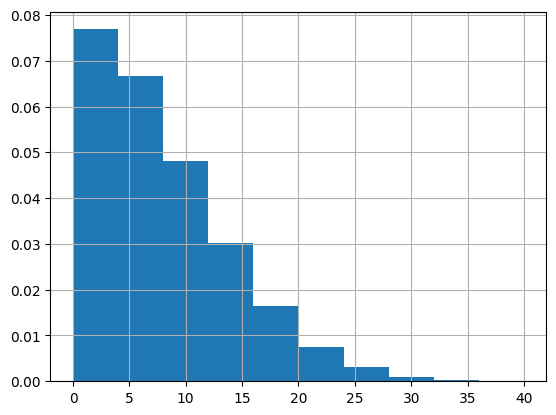

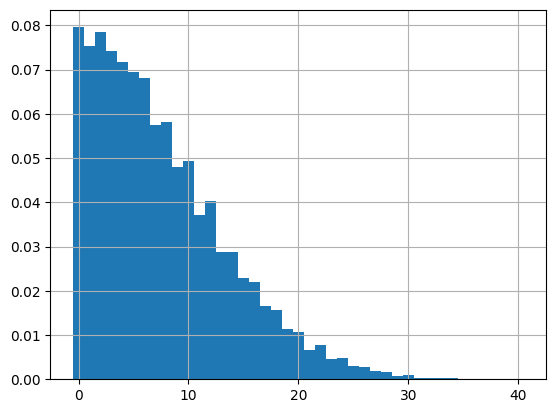

In [7]:
rw_max = rw.max(axis=1)
print(rw_max.shape)

plt.hist(rw_max, density=True)
plt.grid()
plt.show()

bins = np.arange(rw_max.max()+2)-0.5
plt.hist(rw_max, bins, density=True)
plt.grid()
plt.show()

## Magyarázat

A két ábra nagyon hasonlít, a maximumok hisztogrammja olyan mint felső ábra pozitív fele.

A szimmetikus bolyongás egy véletlen sorozat, a szokásos jelölés $(S_k)_{0\leq k\leq n}$.

A maximum eloszlása pl. tükrözési elvvel számolható. $\ell\geq0$-ra:
$$
\mathbb{P}(\max_{k\leq n} S_k\geq x) = 
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n\geq x) +
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n<x)
$$
A második taggal kell foglalkozni. Nézzük azt az esetet, amikor $S_n=y< x$.

Minden lehetséges út egyformán valószínű ($1/2^n$). Így az  a kérdés, hány olyan út van ami $(0,0)$-ból $(n,y)$-ba, aminek maximuma legalább $x$. Az ilyen utak a *jó* utak.

Egy jó út esetén legyen $t$ az első olyan index, amikor az $x$ szinten jár, és a $t$ utáni lépéseket fordítsuk az ellentettjükre.

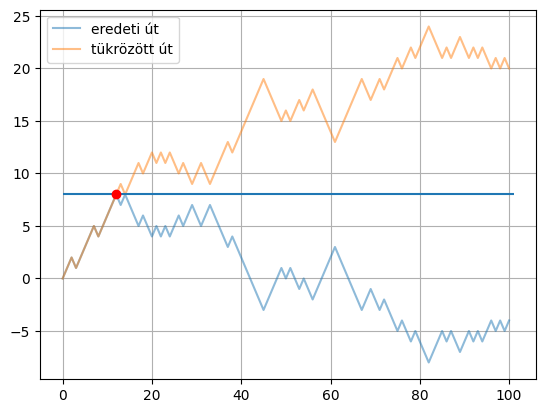

In [8]:

x = 8
idx = np.where((rw_last<x) & (rw_max>=x))[0]

if len(idx)>0:
    idx = idx.min()
    rw0 = rw[idx]
    t = np.where(rw0==x)[0].min()
    rw1 = np.zeros_like(rw0)
    rw1[:t+1] = rw0[:t+1]
    rw1[t+1:] = 2*rw0[t]-rw0[t+1:]
    plt.plot(rw0, label="eredeti út", alpha=0.5)
    plt.plot(rw1, label="tükrözött út", alpha=0.5)
    plt.hlines([x], 0, len(rw0))
    plt.plot(t, x, 'ro')
    plt.grid()
    plt.legend()


Ha $x\geq 0$ és $y<x$, akkor 
a fenti hozzárendelés bijekció azon utak között, amik $(0,0)$-ból $(n,y)$-ba mennek és közben járnak $x$ magasságban és azon utak között, amik 
$(0,0)$-ból $(n,2x-y)$ mennek. A tükrözött útból úgy kaphatjuk vissza az eredetit, hogy $t$ a tükrözött útból is megkapható, mint az első olyan index, amikor az $x$ szinten jár a bolyongás, és a $t$ utáni növekményeket $-1$-gyel szorozzuk.
$$
\begin{aligned}
\mathbb{P}(\max_{k\leq n} S_k\geq x) &= 
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n\geq x) +
\mathbb{P}(\max_{k\leq n} S_k\geq x,\, S_n<x)\\
&= \mathbb{P}(S_n\geq x) +
\mathbb{P}(S_n>x)
\end{aligned}
$$

Ebből
$$
\mathbb{P}(\max_{k\leq n} S_k = x) = \mathbb{P}(S_n = x) + \mathbb{P}(S_n = x+1)
$$

A `plt.hist` függvény használata helyett célszerű magunknak kigyűjteni a gyakoriságokat.

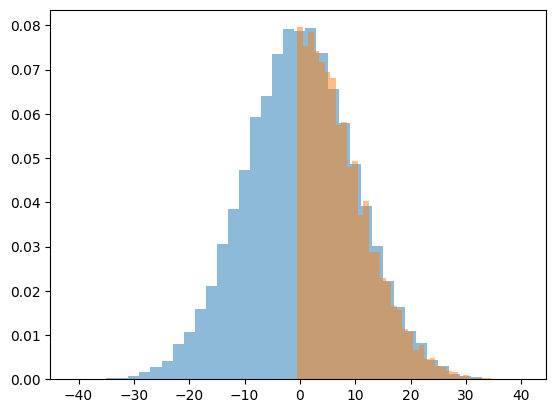

In [9]:
rw_last_values, rw_last_cnts = np.unique(rw_last, return_counts=True)
rw_last_probs = rw_last_cnts/rw_last_cnts.sum()

rw_max_values, rw_max_cnts = np.unique(rw_max, return_counts=True)
rw_max_probs = rw_max_cnts/rw_max_cnts.sum()

plt.bar(rw_last_values, rw_last_probs, width=2, alpha=0.5, label='last')
plt.bar(rw_max_values, rw_max_probs, width=1, alpha=0.5, label='max')
plt.show()

Be tudjuk-e rajzolni a haranggörbét?

Ehhez egyrészt használhatjuk a `scipy.stats` `norm` objektumának `pdf` (probablity density function) metódusát. Vagy megírhatjuk magunk is.

Vegyük észre, hogy 100 lépés után az átlag 0  a szórás $10=\sqrt{100}$. Pl. az mintában amit generáltunk ezek az értékek:

In [10]:
print(f"minta átlag = {rw_last.mean():.3f}, minta szórása={rw_last.std():.3f}")

minta átlag = 0.047, minta szórása=10.013


In [11]:
from scipy.stats import norm as gauss

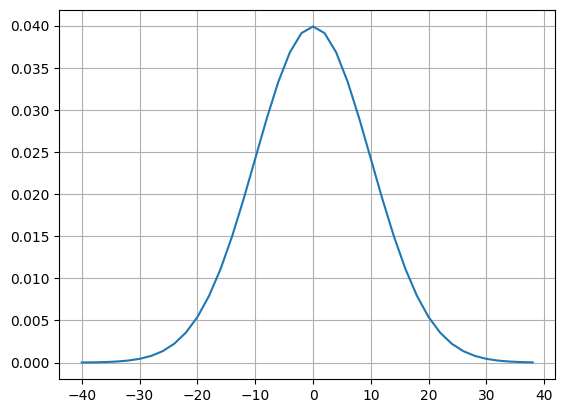

In [12]:
sigma = (rw.shape[1]-1)**0.5
plt.plot(rw_last_values, gauss.pdf(rw_last_values, 0, sigma))
plt.grid()
plt.show()

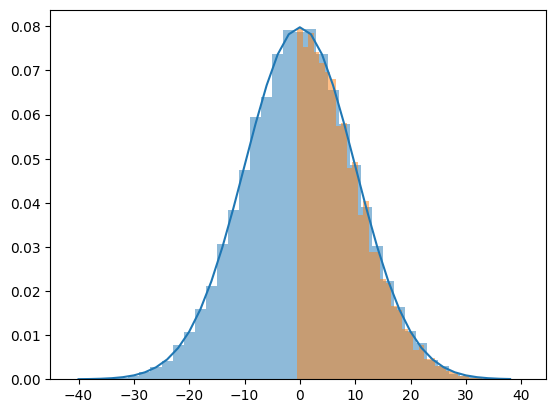

In [13]:
plt.bar(rw_last_values, rw_last_probs, width=2, alpha=0.5)
plt.bar(rw_max_values, rw_max_probs, width=1, alpha=0.5)
plt.plot(rw_last_values, 2*gauss.pdf(rw_last_values, 0, sigma))
plt.show()

## 2. Ugyanez minimummal. 

## 3. Utolsó nullhely.

Szimmetrikus bolyongás alatt olyan véletlen sorozatot értünk, ami a nullából indul és minden lépése (megváltozása) 1 vagy −1, 1/2–1/2
valószínűséggel a többi lépéstől függetlenül.

Írjunk egy függvényt, ami a numpy könyvtár függvényei segítségével elkészíti $n$
hosszú bolyongásoknak egy $m$ elemű sorozatát! Azaz a függvény kimenete egy $m\times n$
mátrix, az egyes sorok az egyes bolyongásokat írják le.

Rajzoljunk ki néhány bolyongást!

A következő részhez $n$ legyen legalább 100 és $m$ legalább 1000.

Minden bolyongásra számoljuk ki az utolsó nulla érték indexét és ezt osszuk el a bolyongás hosszával. Készítsünk hisztogramot az így kapott értékekből.

Extra kérdés, a pontozásba nem számít bele: Van-e olyan szép függvény, ami illeszkedik a hisztogram alakjára.

A bolyongás legyártásában nincs különbség. Az utolsó nullhelyet nehézkesebb csak array műveletekkel számolni.

In [14]:
def last_zero(rw):
    return np.array([np.where(row==0)[0].max() for row in rw])

def last_zero_2(rw):
    return ((rw==0)*np.arange(0, rw.shape[1])).max(axis=1)


In [15]:
%%ipytest

def last_zero_row(row):
    idx = 0
    for i, x in enumerate(row):
        if x==0:
            idx = i
    return idx

def last_zero_with_for(rw):
    return np.array([last_zero_row(row) for row in rw])
    

def test_last_zero():
    rw = random_walk(100,1000)
    assert (last_zero(rw) == last_zero_with_for(rw)).all()
    assert (last_zero_2(rw) == last_zero_with_for(rw)).all()
    

.                                                                                            [100%]
1 passed in 0.03s


rw_last_zero.min()=0.0, rw_last_zero.max()=1.0


(array([ 9969.,  4534.,  4429.,  2638.,  3080.,  3776.,  3328.,  2923.,
         4303., 11020.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

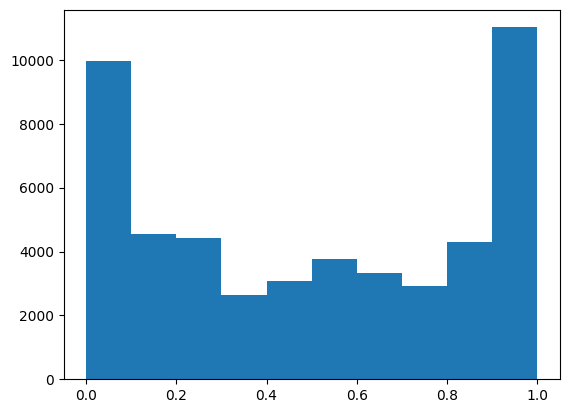

In [16]:

rw_last_zero = last_zero(rw)/(rw.shape[1]-1)
print(f"{rw_last_zero.min()=}, {rw_last_zero.max()=}")
plt.hist(rw_last_zero)


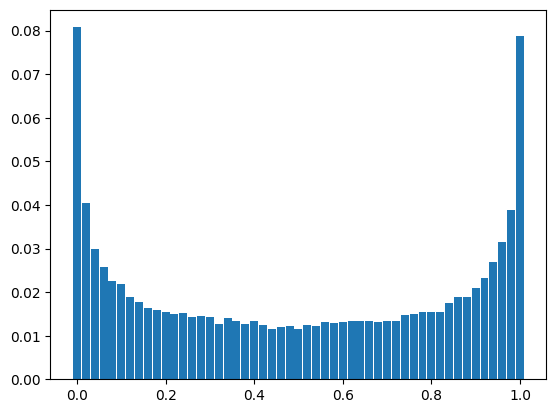

In [17]:
rw_last_zero_values, rw_last_zero_cnts = np.unique(rw_last_zero, return_counts=True)
rw_last_zero_probs = rw_last_zero_cnts/rw_last_zero_cnts.sum()
width = np.diff(rw_last_zero_values).max()
plt.bar(rw_last_zero_values, rw_last_zero_probs, width=0.9*width)
plt.show()

## Magyarázat.

A fenti számolásból
$$
    \mathbb{P}(S_{1}\geq 0, \dots S_n\geq 0) = \mathbb{P}(\min_{k\leq n} S_k\geq 0) = \mathbb{P}(\max_{k\leq n} S_k\leq 0) = \mathbb{P}(\max_{k\leq n} S_k= 0) = \mathbb{P}(S_n=0)+\mathbb{P}(S_n=1) = \mathbb{P}(S_n=0)+\mathbb{P}(S_{n+1}=0) 
$$

Innen 
$$
    \mathbb{P}(S_{1}> 0, \dots S_n> 0) = \frac12\mathbb{P}(\min_{k\leq n} S_k-S_1\geq 0) = \frac12\left(\mathbb{P}(S_{n-1}=0)+\mathbb{P}(S_{n}=0)\right)
$$
és 
$$
    \mathbb{P}(S_{1}\neq 0, \dots S_n\neq 0) = 
    \mathbb{P}(S_{1}> 0, \dots S_n> 0)+\mathbb{P}(S_{1}< 0, \dots S_n< 0) = \mathbb{P}(S_{n-1}=0)+\mathbb{P}(S_{n}=0)
$$

Legyen $n=2k$ páros és $T_n$ az utolsó nullhely az első $n$ lépés során
$$
    \mathbb{P}(T_n = 2\ell)=
    \mathbb{P}(S_{2\ell}=0,\, S_{2\ell+i}-S_{2\ell}\neq 0,\, i=1,\dots,2k-2\ell)
    =\mathbb{P}(S_{2\ell}=0)\mathbb{P}(S_{2(n-\ell)}=0)
    =\frac{1}{2^{2\ell}}\binom{2\ell}{\ell}\frac{1}{2^{2(k-\ell)}}\binom{2(k-\ell)}{k-\ell}
$$

HF középiskolából: rekurzió $I_k = \int_0^{\pi/2}\cos^k(\alpha)d\alpha$. Ha ezt felírjuk, kihasználjuk, hogy $I_0=\pi/2$, $I_1=1$, akkor azt kapjuk, hogy
$$
    \frac1{\sqrt{\pi(k+1/2)}}\leq \frac{1}{2^{2k}}\binom{2k}{k}\leq \frac{1}{\sqrt{\pi k}},
    \quad
    \frac1{\sqrt{\pi(k+1/4)}}\approx \frac{1}{2^{2k}}\binom{2k}{k}
$$

Azaz 

$$
    \mathbb{P}(T_n=2\ell) \approx \frac{2}{n}\left.\frac{1}{\pi}\cdot\frac1{\sqrt{x(1-x)}}\right|_{x=\frac{2\ell}{n}}
$$

,,Ellenőrizzük'' a kapott formulát 

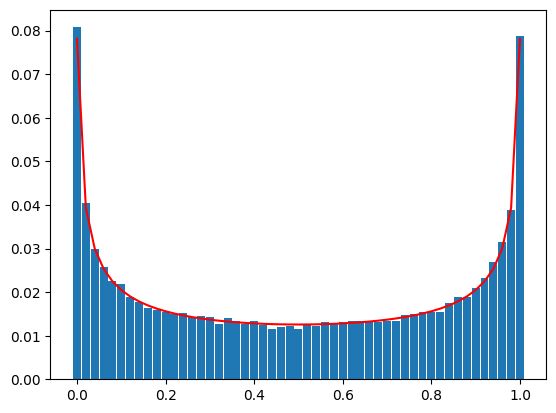

In [18]:
def arcsin_probs(x):
    width = np.diff(rw_last_zero_values).max()
    d = np.zeros_like(x)
    y = (x+0.33*width)*(1-x+0.33*width)
    d[y>0] = width/(np.sqrt(y[y>0])*np.pi)
    return d
    
plt.bar(rw_last_zero_values, rw_last_zero_probs, width=0.9*width)
plt.plot(rw_last_zero_values, arcsin_probs(rw_last_zero_values), color='red')
plt.show()

# `with` statement


 
## Mi történik a `with` statement alkalmazásakor?

### Mit lehet a with mögé írni?

Hasonlóan a `for`-hoz szinte bármit, aminek van két metódusa:

- `__enter__`
- `__exit__`


    with obj as x:
       do_something with x

Itt az `obj.__enter__()` hívás eredménye lesz az x értéke és a block végén **GARANTÁLTAN** végrehajtódik az `obj.__exit__(...)` hívás.
Az `__enter__` metódus végezheti az előkészítést, az `__exit__` a takarítást!

#### Kell-e nekünk ezeket a metódusokat közvetlenül implementálni?

Valójában nem. Elegendő egy generátor függvényt megírni:

    import time
    
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
            

Így még csak egy generátort kapunk ami egyszer visszaad semmit (`None`) majd jelzi, hogy vége van a sorozatnak. 

Próbáljuk ki `for`-ral

In [19]:
import time
    
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")
        
for x in timer():
    print(x)

None
run time: 0.000000


`with`-del hibát kapunk

In [20]:
#with timer() as x:
    #print(x)

A `contextlib` module `contextmanager` függvénye generátorból `contextmanager`-t készít.

In [21]:
from contextlib import contextmanager
timer2 = contextmanager(timer)
with timer2() as x:
    print(x)

None
run time: 0.001000


Ha egy függvény akarunk alkalmazni egy függvényre, hogy azt átalakítsuk, de ugyanaz maradjon a neve akkor a python `@` szintakszist használja. Ilyenkor ,,dekoráljuk'' a függvényt. A `contextmanager` egy példa **dekorátor**ra.

    @contextmanager
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
    
Példaként írjunk egy olyan contextmanager-t, ami jelzi nekünk, hogy mikor milyen hívás történik.

In [22]:
@contextmanager
def print_whats_going_on(x):
    print("try blokk előtt")
    try:
        print("yield előtt")
        yield x
        print("yield után")
    except:
        print("except ág")
    finally:
        print("finally ág")
    print("try blokk után")

In [23]:
with print_whats_going_on("hello") as x:
    print(x)
print("with után")

print("-"*50)

with print_whats_going_on("hello") as x:
    print(x)
    raise ValueError
print("with után")


try blokk előtt
yield előtt
hello
yield után
finally ág
try blokk után
with után
--------------------------------------------------
try blokk előtt
yield előtt
hello
except ág
finally ág
try blokk után
with után


In [24]:
@contextmanager
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

In [25]:
t = timer()
with t:
    time.sleep(0.5)

run time: 0.504196


Használhatjuk-e többször a `timer`-ünket?

In [26]:
#t = timer()
#with t:
#    time.sleep(0.5)
#with t:
#    time.sleep(0.5)
#

## Tudunk-e olyan contextmanagert készíteni, ami többször felhasználható?

pl.

```
with indented:
    indented.print("első")
    with indented:
        indented.print("második")
    indented.print("harmadik")
```

ahol kimenetként azt várnánk, hogy
```
  első
    második
  harmadik
```

In [27]:
class Indent:
    def __init__(self, indent='  '):
        self.level = 0
        self.indent = indent
    
    def __enter__(self):
        self.level += 1
        return None
    
    def __exit__(self, *args):
        self.level -= 1
    
    def print(self, x):
        indent = self.indent*self.level 
        x = str(x)
        print('\n'.join(indent+line for line in x.split('\n')))


In [28]:
indented = Indent('...')
text = """Többsoros szöveg:
Első
Második
"""
with indented:
    indented.print("első")
    with indented:
        indented.print("második")
        with indented:
            indented.print(text)
    indented.print("harmadik")

...első
......második
.........Többsoros szöveg:
.........Első
.........Második
.........
...harmadik


# Feladatok előadásról

Előadáson a föld népességének alakulása szerepelt egy [Kaggle](https://www.kaggle.com) adathalmazon. Mi a 
[https://www.gapminder.org/data/] oldalról származó adatokat fogjuk használni. 

FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE

Felmásoltam őket az óra github repojára, a letöltési címek:


In [29]:
csv_files = {
    "income": "income_per_person_gdppercapita_ppp_inflation_adjusted.csv",
    "life_expectancy": "life_expectancy_years.csv",
    "population": "population_total.csv"
}
regions_url = "http://gapm.io/dl_geo"

baseurl = "https://github.com/prokaj/elte-python/raw/main/"

## Kérdések előadásról:

* Melyek a Föld legsűrűbben lakott országai?
* Melyek a legritkábban lakott országok?
* Földrészenként melyik a három legritkábban lakott ország?
* Melyik földrész népessége nőtt a legtöbbet 1970 óta?

In [30]:
import pandas as pd
import numpy as np
import plotly.express as px

In [31]:

gapminder = px.data.gapminder()
gapminder


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [32]:
print(gapminder.describe())
print('')
print(gapminder.info())


             year      lifeExp           pop      gdpPercap      iso_num
count  1704.00000  1704.000000  1.704000e+03    1704.000000  1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081   425.880282
std      17.26533    12.917107  1.061579e+08    9857.454543   248.305709
min    1952.00000    23.599000  6.001100e+04     241.165876     4.000000
25%    1965.75000    48.198000  2.793664e+06    1202.060309   208.000000
50%    1979.50000    60.712500  7.023596e+06    3531.846989   410.000000
75%    1993.25000    70.845500  1.958522e+07    9325.462346   638.000000
max    2007.00000    82.603000  1.318683e+09  113523.132900   894.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   floa

In [33]:
px.scatter(data_frame= gapminder,
           x= "gdpPercap",
           y="lifeExp", 
           animation_frame="year",
           animation_group="country",
           size="pop", 
           color="continent", 
           hover_name="country",
           log_x=True, 
           size_max=55, 
           range_x=[100, 100000], 
           range_y=[25,90])

Részletesebb adatok:

In [34]:

url = baseurl+csv_files['income']
print(url)
df = pd.read_csv(url, dtype=str)
df.head()

https://github.com/prokaj/elte-python/raw/main/income_per_person_gdppercapita_ppp_inflation_adjusted.csv


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


In [35]:
from collections import defaultdict
col_types = defaultdict(list)
for col in df.columns:
    col_types[str(df[[col]].values.dtype)].append(col)

print(dict(col_types))
    


{'object': ['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921', '

In [36]:
import re

In [37]:
units = {'k': 10**3, 'M': 10**6}
def convert(x: str):
    i = re.match(r'[0-9.]*', x).endpos
    return int(float(x[:i]) *units[x[i:]])

## Feladat.

Olvassuk be az adatokat és válaszoljuk meg a fenti kérdéseket: 

* Melyek a Föld legsűrűbben lakott országai?
* Melyek a legritkábban lakott országok?
* Földrészenként melyik a három legritkábban lakott ország?
* Melyik földrész népessége nőtt a legtöbbet 1970 óta?

# Conway Game of Life


The Game of Life is a cellular automaton created by mathematician John Conway in 1970. The game consists of a board of cells that are either on or off. One creates an initial configuration of these on/off states and observes how it evolves. There are four simple rules to determine the next state of the game board, given the current state:

- **Overpopulation**: if a living cell is surrounded by more than three living cells, it dies.
- **Stasis**: if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation**: if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction**: if a dead cell is surrounded by exactly three cells, it becomes a live cell.


Írjunk egy osztályt a játékhoz, pl. az `__init__` metódus hozzalétre a megadott konfigurációnak megfelelő objektumot. Legyen egy `step` metódus, ami a rendszert a következő állapotába viszi és az `__str__` metódus pedig
valahogy ábrázolja az aktuális állapotot. 

Tegyük fel, hogy a rács amin a rendszer él, egy $n\times n$-es rács, ahol mindkét irányban ciklikusan körbemegyünk,
azaz a csúcsokat modulo $n$ tekintjük.


In [39]:
class ConwayGoL:
    
    def __init__(self, state):
        self.state = list(state)

    def step(self):
        return self

    def __repr__(self):
        return f"{type(self).__name__}({self.state})"

In [40]:
import random

init_state = [] ## ???
conway = ConwayGoL(init_state)

conway.step()


ConwayGoL([])

A játék állapotának leírásához egy $n\times n$ rács minden pontjáról tudni kell, hogy foglalt-e vagy sem.

```
n = 11
state = [[0]*n for _ in range(n)]
```

Véletlenszerű kezdeti állapot:
```
state = [[random.randint(0,1) for _ in range(n)] for _ in range(n)]
```

In [41]:
def random_state(n, m, p):
    return [[int(random.random()<p) for _ in range(m)] for _ in range(n)]

state = random_state(11, 25, 0.2)
print(state)

[[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]


Szebb megjelenítés?

In [42]:
def as_matrix(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

print('\n'.join(''.join(map(str, line)) for line in state))


0001001100000000000101000
0001000001000000110001000
0001001101100000000000010
0000000001000000010010010
0000000000000000010010001
0100000000000000000000000
0001000110011000000010000
1100000110001010001010100
0100101000110000000000010
1001000001110011001010010
0000010100100000000100100


In [43]:
symbols = "\u2b1c\u2b1b"
print('\n'.join(''.join(symbols[x] for x in line) for line in state))


⬜⬜⬜⬛⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬛⬛⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬛⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬛⬛⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬛⬜⬛⬜⬜⬜⬛⬜⬛⬜⬛⬜⬜
⬜⬛⬜⬜⬛⬜⬛⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬛⬜⬜⬛⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬛⬛⬜⬜⬛⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜


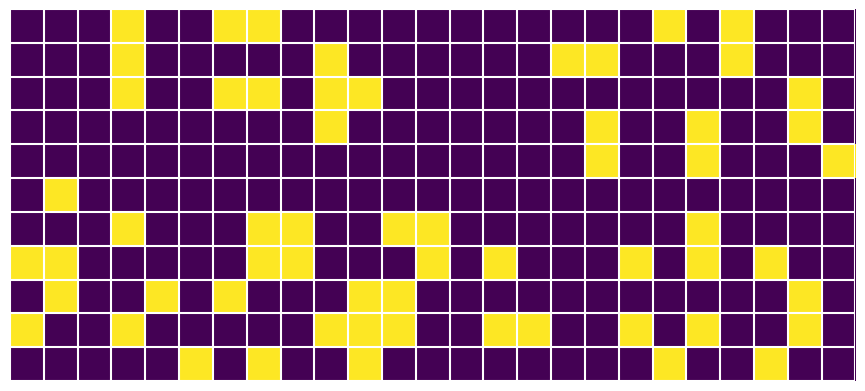

In [47]:
import matplotlib.pyplot as plt 

img = plt.matshow(state, cmap="viridis")
img.axes.axis(False)
n, m = len(state), len(state[0])
for pos in range(0, n+1):
    img.axes.axhline(y=pos-0.5, color="white")
for pos in range(0, m+1):
    img.axes.axvline(x=pos-0.5, color="white")

plt.show()

In [48]:
def cgol_str(self):
    symbols = "\u2b1c\u2b1b"
    return '\n'.join(''.join(symbols[x] for x in line) for line in self.state)

ConwayGoL.__str__ = cgol_str

In [49]:
conway = ConwayGoL(state)
print(conway)

⬜⬜⬜⬛⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬛⬛⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬛⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬛⬛⬜⬜⬜⬜⬜⬛⬛⬜⬜⬜⬛⬜⬛⬜⬜⬜⬛⬜⬛⬜⬛⬜⬜
⬜⬛⬜⬜⬛⬜⬛⬜⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜
⬛⬜⬜⬛⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬛⬛⬜⬜⬛⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬛⬜⬛⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜


A `step` metódushoz ki kellene számolni egy adott csúcs foglalt szomszédainak számát `cnt`. Ha ez kész,
akkor az $i$ csúcs új állapota:

$$
    \text{state}_{t+1}[i]=
    \begin{cases}
    1 &\text{Ha $\text{cnt}[i]\in\{2,3\}$ és $\text{state}_t[i]=1$}\\
    1 &\text{Ha $\text{cnt}[i]\in\{3\}$ és $\text{state}_t[i]=0$}\\
    0 &\text{különben}
    \end{cases}
$$

In [50]:
def newstate(state, count):
    return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

In [51]:
%%ipytest

def test_newstate():
    res = [0]*9
    res[2] = 1
    res[3] = 1
    assert newstate([1]*9, list(range(9))) == res
    res = [0]*9
    res[3] = 1    
    assert newstate([0]*9, list(range(9))) == res


.                                                                                            [100%]
1 passed in 0.01s


In [52]:
def count_neighbors(state):
    strides = [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)] 
    n, m = len(state), len(state[0])
    return [ [sum(state[(i+di) % n][(j+dj) % m] for di, dj in strides) for j in range(m)] for i in range(n)]

def cgol_step(self):
    counts = count_neighbors(self.state)
    self.state = [ newstate(line, cnt) for line, cnt in zip(self.state, counts) ]
    return self
    
ConwayGoL.step = cgol_step

In [53]:
@classmethod
def cgol_from_random_state(cls, n, m,  p):
    return cls(random_state(n, m, p))

ConwayGoL.from_random_state=cgol_from_random_state

In [54]:
conway = ConwayGoL.from_random_state(4, 4, 0.3)
print(conway)
print(count_neighbors(conway.state))

⬜⬜⬜⬜
⬛⬜⬜⬛
⬜⬜⬛⬜
⬜⬜⬛⬛
[[3, 2, 3, 4], [1, 2, 2, 2], [3, 3, 3, 5], [1, 2, 2, 2]]


In [55]:
conway = ConwayGoL.from_random_state(5, 5, 0.5)
print(conway)
print("-"*20)
print(conway.step())

⬜⬜⬜⬜⬛
⬜⬜⬜⬛⬜
⬛⬜⬜⬜⬜
⬜⬛⬜⬛⬛
⬜⬛⬛⬛⬜
--------------------
⬜⬜⬜⬜⬛
⬜⬜⬜⬜⬛
⬛⬜⬛⬛⬜
⬜⬛⬜⬛⬛
⬜⬛⬜⬜⬜


Tudunk-e valami animációszerűt készíteni? Jupyter notebook-ban pl. a következő képpen lehet: 

In [56]:
from ipywidgets import Output
from time import sleep

out = Output()
display(out)
conway = ConwayGoL.from_random_state(n=31, m=55, p=0.2)

for i in range(100):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{conway}")  
    sleep(0.2)
    conway.step()


Output()

KeyboardInterrupt: 

Ha parancssorból dolgozunk, akkor valami ilyesmit lehetne tenni

In [57]:
#%%writefile conway.py

import random


def random_state(n, m, p):
    return [ [ int(random.random()<p) for _ in range(m) ] for _ in range(n) ]

def count_neighbors(state):
    strides = [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)] 
    n, m = len(state), len(state[0])
    return [ [sum(state[(i+di) % n][(j+dj) % m] for di, dj in strides) for j in range(m)] for i in range(n)]

def newstate(state, count):
    return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

class ConwayGoL:
    symbols = "\u2b1c\u2b1b"
    
    def __init__(self, state):
        self.state = list(state)
        
    def step(self):
        counts = count_neighbors(self.state)
        self.state = [ newstate(line, cnt) for line, cnt in zip(self.state, counts) ]
        return self

    
    def __str__(self): 
        symbols = self.symbols
        return '\n'.join(''.join(symbols[x] for x in line) for line in self.state)

    def __repr__(self):
        return f"{type(self).__name__}({self.state})"
    
    @classmethod
    def from_random_state(cls, n, m, p):
        return cls(random_state(n, m, p))

    def is_empty(self):
        return not any(any(line) for line in self.state)


def clear_terminal(n):
    print(f"{chr(27)}[{n+1}A", end="")

def main(n=11, m=25, p=0.2, nsteps=10, clear_screen=clear_terminal):
    from time import sleep
    conway = ConwayGoL.from_random_state(n, m, p)
    for i in range(nsteps+1):
        if i>0:
            clear_screen(n)
        print(f"after {i} step:")
        print(conway)  
        sleep(0.2)
        conway.step()
        if conway.is_empty():
            break
    
if __name__ == "__main__":
    main()
    

Writing conway.py


Ha valamit már megírtunk és szeretnénk használni, `import`-tal elérhető. Pl.

### Tudunk-e paramétereket adni a python scriptnek?

Amikor egy python scriptet futtatunk, a parancssor (amivel a futást indítottuk) a `sys` modul `argv` változójában érhető el.

In [58]:
import sys
sys.argv

['c:\\Users\\User\\miniconda3\\lib\\site-packages\\ipykernel_launcher.py',
 '--ip=127.0.0.1',
 '--stdin=9013',
 '--control=9011',
 '--hb=9010',
 '--Session.signature_scheme="hmac-sha256"',
 '--Session.key=b"c3c62824-e5db-40d2-81ee-16e7d275d209"',
 '--shell=9012',
 '--transport="tcp"',
 '--iopub=9014',
 '--f=c:\\Users\\User\\AppData\\Roaming\\jupyter\\runtime\\kernel-v2-197125XkA2OH4yeGz.json']

In [59]:
! python -c 'import sys; print(sys.argv)' -alma


  File "<string>", line 1
    'import
           ^
SyntaxError: EOL while scanning string literal


Egy nagyon egyszerű megoldás, ha minden opciónak a neve a paraméter amit beállít és egyenlőségjel után az értéke:
pl. n=11 m=25 nstep=10 p=0.2

In [60]:
cmdline = "conway.py -n=11 -m=25 -nstep=10 -p=0.2"
argv = cmdline.split()
params =[param.split("=") for param in argv[1:]]
params

[['-n', '11'], ['-m', '25'], ['-nstep', '10'], ['-p', '0.2']]

Minden paraméterről tudni kellene, hogy milyen típusú!

In [61]:
param_types={'-n': int, '-m': int, '-nstep': int, '-p': float}
params = {k.replace("-",""): param_types[k](v)  for k, v in (param.split("=") for param in argv[1:])}
params

{'n': 11, 'm': 25, 'nstep': 10, 'p': 0.2}

Ezek után a `main` függvényt a megadott paraméterekkel meg tudjuk hívni:

```
    main(**params)
```
Mi van a `default` értékekkel, `help`-pel stb.

Ezeket mind meg tudnánk írni, de nem kell. Van kész megoldás `python`-ban.

Az `argparse` könvytár mindent megcsinál, ami nekünk kell.

In [62]:
import argparse

help(argparse)

Help on module argparse:

NAME
    argparse - Command-line parsing library

MODULE REFERENCE
    https://docs.python.org/3.9/library/argparse
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module is an optparse-inspired command-line parsing library that:
    
        - handles both optional and positional arguments
        - produces highly informative usage messages
        - supports parsers that dispatch to sub-parsers
    
    The following is a simple usage example that sums integers from the
    command-line and writes the result to a file::
    
        parser = argparse.ArgumentParser(
            description='sum the integers at the command line')
        parser.add_argument(
      

A `conway.py` file végét cseréljük le erre.
```
if __name__=="__main__":

    import argparse
    
    parser = argparse.ArgumentParser(description='Conways Game of Life')

    parser.add_argument(
        '-n', '--nrows', 
        type=int, 
        default=11, 
        help='number of rows'
        )

    parser.add_argument(
        '-m', '--ncols',
        type=int, 
        default=25, 
        help='number of columns'
        )

    parser.add_argument(
        '-p', '--density',
        type=float, 
        default=0.2,
        help='initial density')
    
    parser.add_argument(
        '--nsteps', 
        type=int, 
        default=10, 
        help='steps to display'
        )

    args = parser.parse_args()
    
    main(n=args.n, m=args.m, p=args.p, nsteps=args.nsteps)
```
    

In [ ]:
# import importlib
# importlib.reload(conway)

In [63]:
#import conway

out1 = Output()
display(out1)

with out1:
    conway.main(clear_screen=lambda n: out1.clear_output(True))

ModuleNotFoundError: No module named 'conway'

Az `argparse` könyvtár nem a legkényelmesebb. Alternatívák:

- [Docopt](http://docopt.org/)
- [Click](https://pypi.org/project/click/)
- [clize](https://github.com/epsy/clize)

és még sok másik is!

## Itt is használhattunk volna dekorátort


A `ConwayGoL` példában utólag adtunk metódusokat az osztályunkhoz. Ezt is megtehettük volna dekorátorral.  

In [64]:
def conway_method(f):
    setattr(ConwayGoL, f.__name__, f)
    return f


@conway_method
def dummy_method(self):
    print("this is a message from the new method!")

c = ConwayGoL([], 0)
c.dummy_method()

TypeError: __init__() takes 2 positional arguments but 3 were given

Azt is megtehettük volna, hogy a osztály nincs beleégetve a kódba.

In [ ]:
def new_method(cls):
    def decorator(f):
        setattr(cls, f.__name__, f)
        return f 
    return decorator

@new_method(ConwayGoL)
def dummy_method(self):
    print("Note that the old value of dummy_method is overwritten!")

In [ ]:
c.dummy_method()